In [ ]:
Firstly you need to install pyemd.

Online documentation: https://pyemd.readthedocs.org
Issue tracker: https://github.com/laszukdawid/pyemd/issues
Source code repository: https://github.com/laszukdawid/pyemd

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy.signal import hilbert
import numpy  as np

from PyEMD import EMD

# Define signal
dat = pd.read_csv('GER19.csv')
s = np.array(dat["seares"])[0:144]
t = np.array(dat["t"])[0:144]

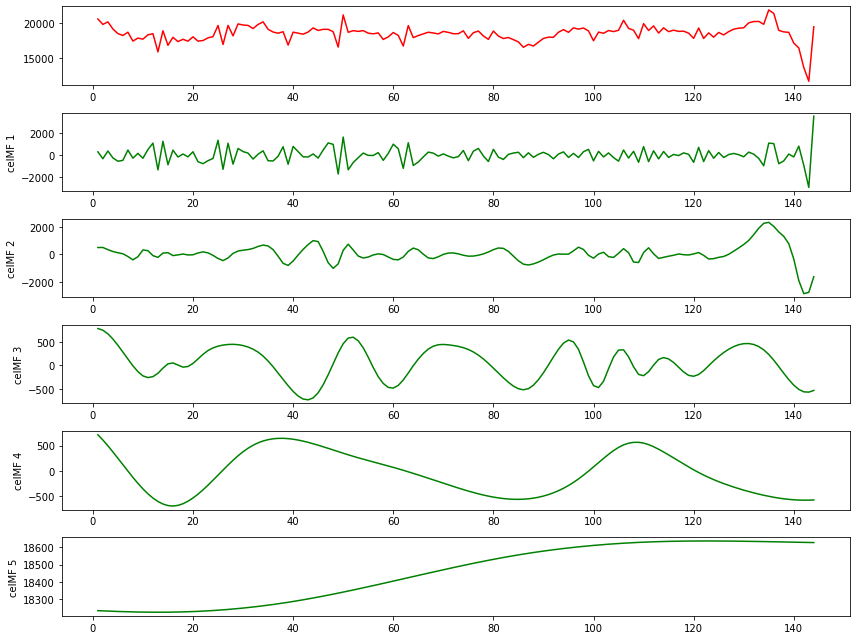

In [32]:
from PyEMD import CEEMDAN

# Assign ICEEMDAN to `eemd` variable
ceemdan = CEEMDAN()


# Execute ICEEMDAN on S
ceIMFs = ceemdan.ceemdan(s, t)
nIMFs = ceIMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, s, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, ceIMFs[n], 'g')
    plt.ylabel("ceIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.tight_layout()


In [33]:
from PyEMD import CEEMDAN

# Assign ICEEMDAN to `eemd` variable
ceemdan = CEEMDAN()
QQQ = np.zeros((5,144))
Q = 0

# Execute CEEMDAN on S
for i in range(0,100):
    ceIMFs = ceemdan.ceemdan(s, t)
    nIMFs = ceIMFs.shape[0]
    if nIMFs == 5:
        Q = Q + 1
        QQQ = QQQ + ceIMFs
        

print(Q)

QQQ = QQQ/Q
np.savetxt('xxx.csv', QQQ, delimiter = ',')

95


In [ ]:
# Plot results
plt.figure(figsize=(12,9))


for n in range(5):
    plt.subplot(6, 1, n+2)
    plt.plot(t, QQQ[n], 'g')
    plt.ylabel("IMF %i" %(n+1),fontsize=20)
    plt.locator_params(axis='y', nbins=5)

plt.tight_layout()

plt.show